# Interactive Graphs with Plotly

## What you'll learn in this course 🧐🧐

Creating graphs is important. Plotly express is a must-have when it comes to static graphics but sometimes, you will need to create visualisations that users can interact with. This is when Plotly Graph Object comes into play. This module will allow you to create any type of graphs that any user can interact with.  

In this lecture about Plotly, we will cover:

* Create highly-customized visualisations with plotly.graph_objects
* Create subplots
* Add interactivity
* Create animations

Before going deeper in Plotly's submodules, let's have a look at the official documentation : https://plotly.com/python-api-reference/

## Advanced visualizations with plotly.graph_objects

If you want more control on the aesthetics or if you'd like to create highly customized visualizations, you'll need to use Plotly's `graph_object` module.

Graph objects give you more flexibility as you will use Python classes to configure your graph. As the documentation states, it has several benefits:

* _Graph objects provide precise data validation. If you provide an invalid property name or an invalid property value as the key to a graph object, an exception will be raised with a helpful error message describing the problem. This is not the case if you use plain Python dictionaries and lists to build your figures._

* _Graph objects contain descriptions of each valid property as Python docstrings. You can use these docstrings in the development environment of your choice to learn about the available properties as an alternative to consulting the online Full Reference._

* _Properties of graph objects can be accessed using both dictionary-style key lookup (e.g. `fig["layout"]`) or class-style property access (e.g. fig.layout)._

* _Graph objects support higher-level convenience functions for making updates to already constructed figures._

Let's begin with a simple example :

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default = "svg" # this line must be commented if working on colab


In [2]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


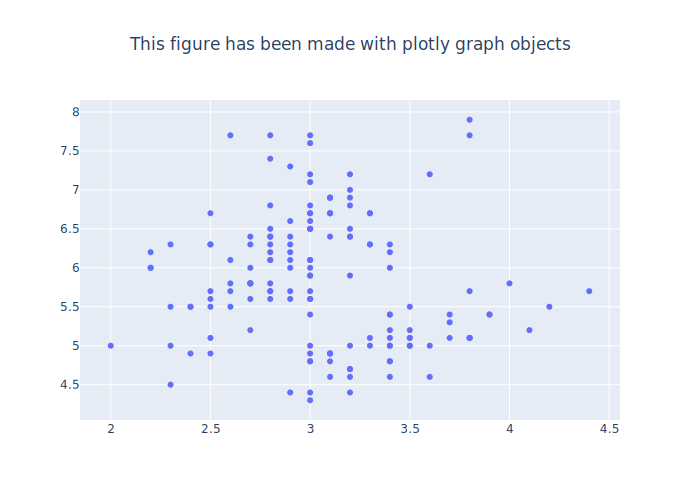

In [3]:
fig = go.Figure(
    data = go.Scatter(
        x = df['sepal_width'],
        y = df['sepal_length'],
        mode = 'markers'),
    layout = go.Layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
    )
)

fig.show()

As you can see, we declare an instance of `go.Figure()` and then, there are two arguments to set :
* `data` contains a trace object (or a list of trace objects) that describes the type of visualisation to be shown. Here, we used an instance of `go.Scatter`() to make a scatter plot. You can check the [documentation](https://plotly.com/python-api-reference/plotly.graph_objects.html) to know the list of traces that are available.
* `layout` contains an instance of `go.Layout` that allows to set the layout options. In our example, we used it to define the title of the figure and make it centered.

The different traces and layout constructors have a long list of arguments that can be used to make subtle changes in the figure. Basically, almost every change you can imagine can be set by using one of these arguments. We can't give you an exhaustive list of examples, we'll just advise you instead to use the `?` feature of jupyter notebooks as shown below, such that you can find what you need.

For example, in the figure above, we deduced from `go.Scatter?` that there exists a `mode` argument that allows use to show only the markers (and not the line). And by using `go.Layout?` we noticed there is a `title` argument that should be an instance of `go.layout.Title`, then we used `go.layout.Title?` to understand how to use it.

In [4]:
go.Scatter?

In [5]:
go.Layout?

In [6]:
go.layout.Title?

Let's refine our scatter plot by using more graph objects :
* `go.scatter.Marker` that provides control on the marker's style (here, we use it to change the marker colors)
* `go.layout.XAxis` and `go.layout.YAxis` that allow us to define the axes' title and ranges

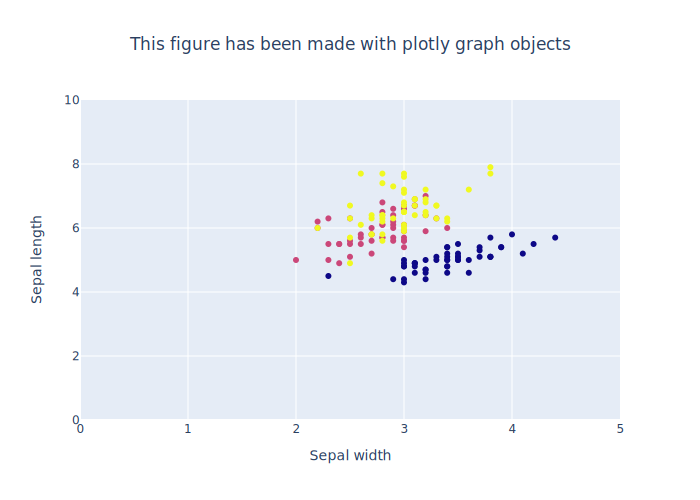

In [7]:
fig = go.Figure(
    data = go.Scatter(
        x = df['sepal_width'],
        y = df['sepal_length'],
        mode = 'markers',
        marker = go.scatter.Marker(color = df['species_id'])),
    layout = go.Layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Sepal width', range = [0, 5]),
        yaxis = go.layout.YAxis(title = 'Sepal length', range = [0, 10])
    )
)

fig.show()

In [8]:
go.scatter.Marker?

In [9]:
go.layout.XAxis?

#### Updating a figure
You can update an existing figure by adding new traces or changing the layout as follows, thanks to the `add_trace` and `update_layout` methods :

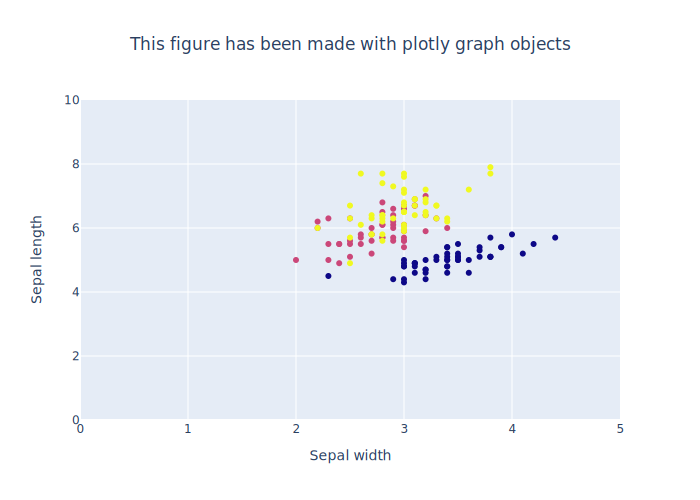

In [10]:
fig = go.Figure(
    data = go.Scatter(
        x = df['sepal_width'],
        y = df['sepal_length'],
        mode = 'markers',
        marker = go.scatter.Marker(color = df['species_id'])),
    layout = go.Layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Sepal width', range = [0, 5]),
        yaxis = go.layout.YAxis(title = 'Sepal length', range = [0, 10])
    )
)

fig.show()

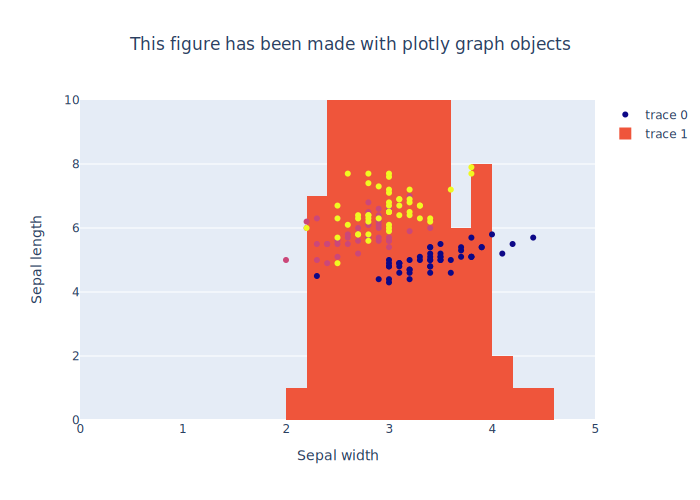

In [11]:
# Add the distribution of sepal_width on the same graph
fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

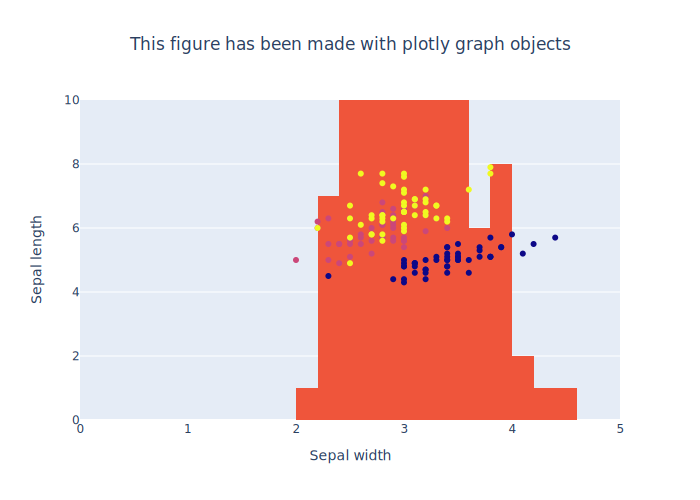

In [12]:
# Hide the legend
fig.update_layout(showlegend=False)

## Creating subplots
You can also use `make_subplots` together with `add_trace` to separate the different plots :

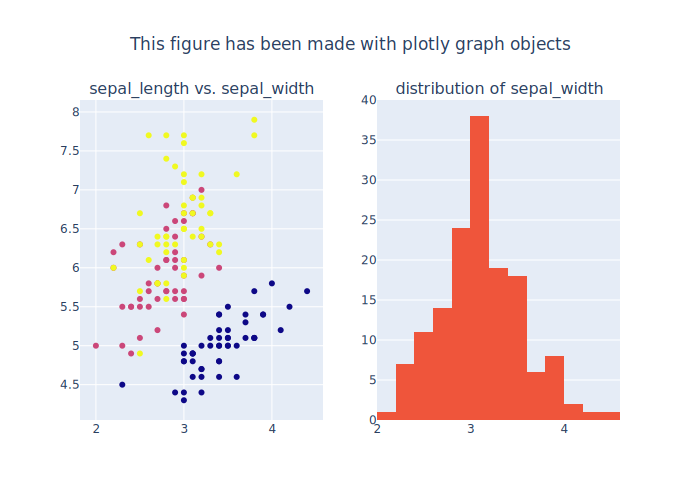

In [13]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("sepal_length vs. sepal_width", "distribution of sepal_width"))

fig.add_trace(
    go.Scatter(
        x = df['sepal_width'],
        y = df['sepal_length'],
        mode = 'markers',
        marker = go.scatter.Marker(color = df['species_id'])),
        row = 1,
        col = 1
)

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']),
        row = 1,
        col = 2)

fig.update_layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        showlegend = False)

## Adding some interactivity

### Range sliders

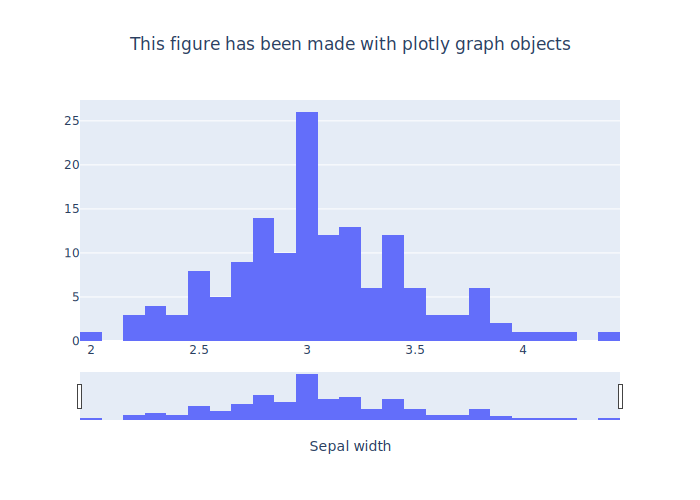

In [14]:
fig = go.Figure(
    data = go.Histogram(
        x = df['sepal_width'],
        nbinsx = 40),
    layout = go.Layout(
        title = go.layout.Title(text = "This figure has been made with plotly graph objects", x = 0.5),
        xaxis = go.layout.XAxis(title = 'Sepal width', rangeslider = go.layout.xaxis.Rangeslider(visible = True))
    )
)

fig.show()

### Dropdown menus

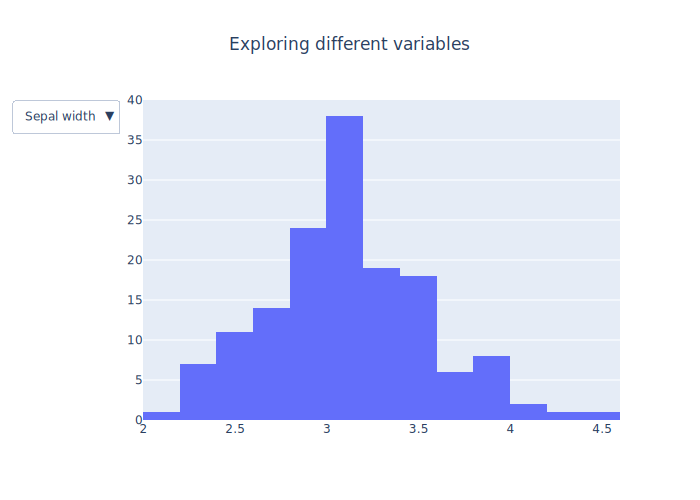

In [15]:
# Example of how to allow the selection of a type of a variable
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

fig.add_trace(
    go.Histogram(
        x = df['sepal_length'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = df['petal_width'],
        visible = False))

fig.add_trace(
    go.Histogram(
        x = df['petal_length'],
        visible = False))


fig.update_layout(
        title = go.layout.Title(text = "Exploring different variables", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Sepal width",
                        method = "update",
                        args = [{"visible" : [True, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Sepal length",
                            method = "update",
                            args = [{"visible" : [False, True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Petal width",
                            method = "update",
                            args = [{"visible" : [False, False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Petal length",
                            method = "update",
                            args = [{"visible" : [False, False, False, True]}])
                ]
    )]
)

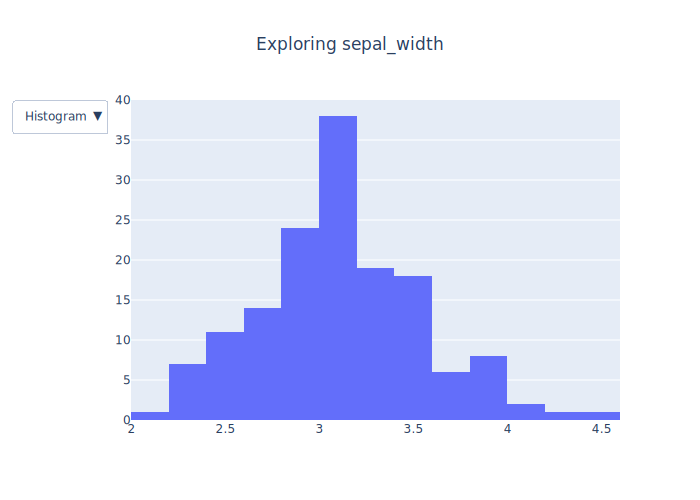

In [16]:
# Example of how to allow the selection of a type of visualisation
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = df['sepal_width']))

fig.add_trace(
    go.Box(
        x = df['sepal_width'],
        visible = False))

fig.add_trace(
    go.Violin(
        x = df['sepal_width'],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Exploring sepal_width", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Histogram",
                        method = "update",
                        args = [{"visible" : [True, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Box plot",
                            method = "update",
                            args = [{"visible" : [False, True, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Violin plot",
                            method = "update",
                            args = [{"visible" : [False, False, True]}])
                ]
    )]
)

### Mastering animations with plotly.graph_objects
It's possible to create the animated graphs with graph objects, but it's far more complex ! If you want to go further on this topic, you can check [this tutorial](https://plotly.com/python/animations/) (but it's not mandatory in the scope of this introductory lecture about Plotly ;-) )

## Resources 📚📚

* [Creating and Updating Figures in Python](https://plotly.com/python/creating-and-updating-figures/#make-subplots)
* [Make Subplots](https://plotly.com/python/creating-and-updating-figures/#make-subplots)
* [Intro to Animations in Python](https://plotly.com/python/animations/)
* [How to make Plotly graph animated working](https://stackoverflow.com/questions/61176493/how-to-make-plotly-graph-animated-working)
